Name: Rohit Goutam Maity

Course Id: CSC 481

Student Id: 2188913


# Part 1:

(a) Use your code to shrink an image by a factor of 8 in each dimension (e.g. from 800x800 to 100x100pixels). Show the shrunk image.

(b) Use your code to zoom the image back to its original size (e.g., from 100x100 to 800x800). Show the zoomed image and explain how and why the original image and the shrunk/zoomed images are different.
In addition to your commentary on the visual differences, perform image subtraction between the original image and the restored image and show the subtraction results.

For every input image (you have 3 inputs, see Data), you must show: the original image, the shrunk
image, the restored image, and the difference image.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def scale_image(image, factor):
  """
  Function to scale an image using pixel replication (zooming) and decimation (shrinking).
    - Positive factor: Zooms the image by replicating pixels.
    - Negative factor: Shrinks the image by decimating pixels.
    - Factor 0: Returns the original image.
    """
  if factor == 0:
    return image.copy()

  height, width = image.shape[:2]
  if factor > 0:
    zoomed = cv2.resize(image, (width * factor, height * factor), interpolation=cv2.INTER_NEAREST)
    return zoomed

  elif factor < 0:
    factor = abs(factor)
    shrunk = image[::factor, ::factor]
    return shrunk



In [ ]:
def image_subtraction(original, restored):
    """
    Performs image subtraction between original and restored images.
    Returns the absolute difference (normalized for better visibility).
    """
    # Resize restored image back to original size for fair comparison
    original_resized = cv2.resize(original, (restored.shape[1], restored.shape[0]), interpolation=cv2.INTER_NEAREST)

    # Compute absolute difference
    diff = cv2.absdiff(original_resized, restored)

    # Normalize the difference for better visualization
    diff_normalized = cv2.normalize(diff, None, 0, 255, cv2.NORM_MINMAX)

    return diff_normalized

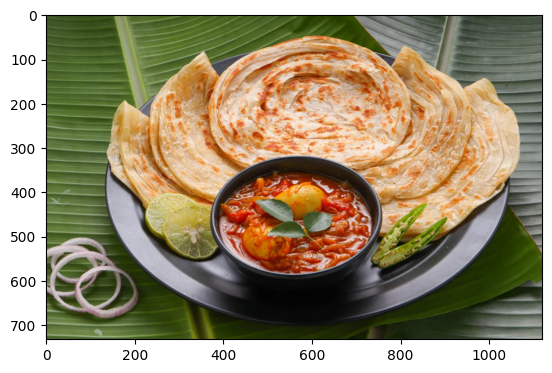

In [ ]:
image_path = "/content/food_image1.jpg" # This is image is taken from the google.com website and this is a local Indian Cuisine food :)
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [ ]:
# Step 1: shrink the image by a factor of 8
shrunk_image = scale_image(image, -8)

In [ ]:
# step 2: Restore the image by zooming it back to the original size
restored_image = scale_image(shrunk_image, 8)

In [ ]:
# Step 3: Perform image Subtraction
difference_image = image_subtraction(image, restored_image)

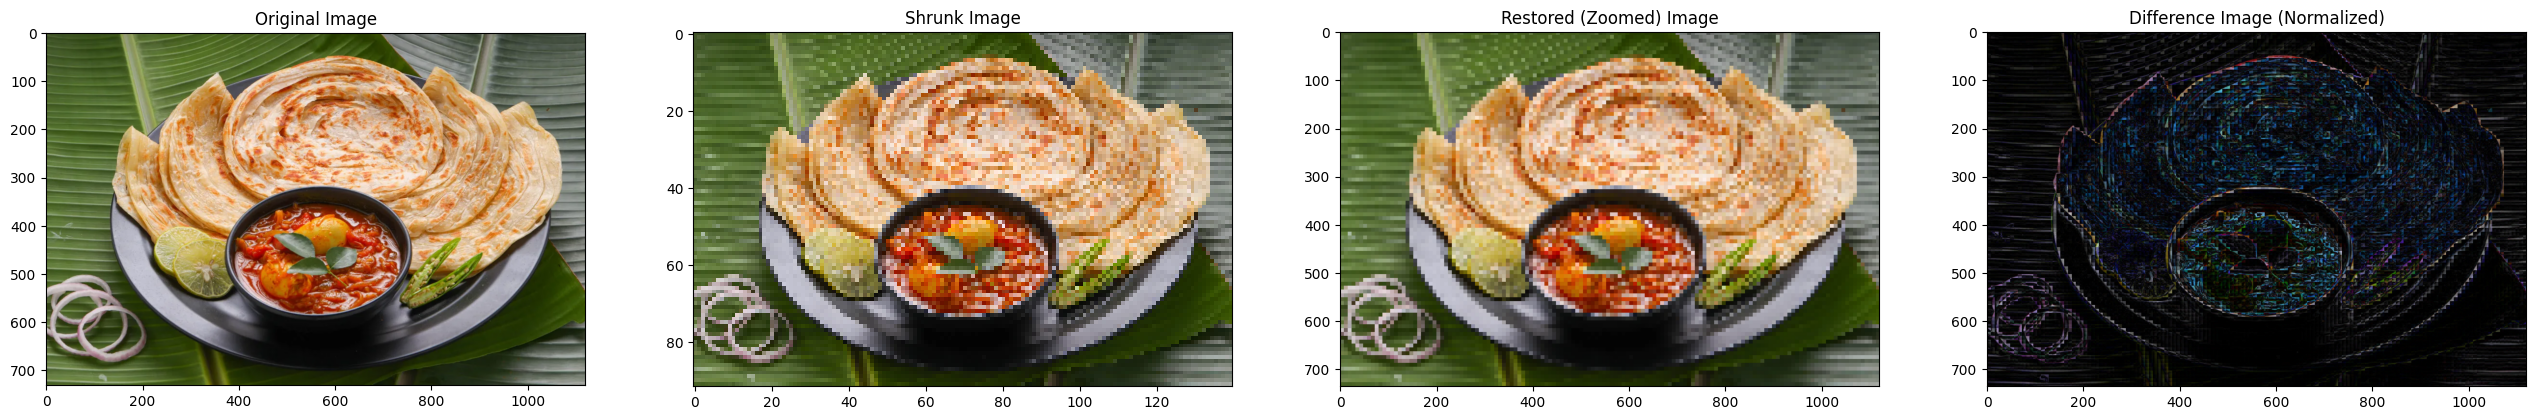

In [ ]:
# Display results
fig, axes = plt.subplots(1, 4, figsize=(32, 8))
axes[0].imshow(image)  # No cmap, so it stays in color
axes[0].set_title("Original Image")

axes[1].imshow(shrunk_image)  # No cmap
axes[1].set_title("Shrunk Image")

axes[2].imshow(restored_image)  # No cmap
axes[2].set_title("Restored (Zoomed) Image")

axes[3].imshow(difference_image)  # Difference should still be grayscale
axes[3].set_title("Difference Image (Normalized)")

plt.show()

**Answer for the part 1 problem:**

(a) Shrinking the Image by a Factor of 8

* The original image was resized by a factor of -8, meaning every 8th pixel was retained while all others were removed.
* This resulted in a loss of detail as a significant number of pixels were removed.
* The shrunk image appears smaller and has visible blocky pixelation due to the aggressive downsampling.

(b) Zooming the Image Back to Original Size

* The shrunk image was zoomed back by a factor of 8 using pixel replication.
Since shrinking removes details permanently, restoring the image does not bring back lost details.
* Instead, the restored image appears blurry and pixelated because each pixel from the shrunk image was simply replicated into an 8x8 block.
* The restored image lacks sharp edges and has a blocky structure.

(c) Difference Between Original and Restored Images

* Image subtraction was performed between the original and restored image.
* The difference image shows edges and texture loss, highlighting regions where details were lost during shrinking.
* Dark areas in the difference image indicate areas with minimal change, while bright edges indicate sharp differences.
* This confirms that shrinking permanently discards fine details, which cannot be restored by simple pixel replication.

# Part 2

Write code that will do the following:

1) Load your input image.

2) If the image is not grayscale already, your code must convert it to grayscale.

3) If your image is stored as an array of bytes or integer values, convert it to floating point values.

4) If range of values in your image is from 0 to 255, convert them to values between 0.0 to 1.0 by dividing them by 255.0 (this will not work well if you skip the previous step!)

5) Create an inverted image, where for every pixel: [N𝑒𝑤 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦] = 1.0 –[𝑂𝑙𝑑 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦]

6) Use the power function to play with the contrast of the image.

  * a. Pick a total of 4 values: 2 values between 0.25 to 0.99, and 2 values between 1.1 to 4.0.

  * b. For each of these values, create a copy of the image where: i. [𝑁𝑒𝑤 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦] = 𝑝𝑜𝑤𝑒𝑟( [𝑂𝑙𝑑 𝐼𝑛𝑡𝑒𝑛𝑠𝑖𝑡𝑦],[𝑦𝑜𝑢𝑟  𝑣𝑎𝑙𝑢𝑒])

For every input image (you have 3 inputs, see Data), you must show: the original image, the inverted image, 2 images with decreased contrast, 2 images with increased contrast. Keep in mind that to display these images, you might need to revert step 3 and 4 (multiply by 255.0, and convert to byte or integer
values).

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def process_image(image_path):
    # Step 1: Load the image
    image = cv2.imread(image_path)

    # Step 2: Convert to grayscale if not already
    if len(image.shape) == 3:  # Check if image has color channels
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    else:
        gray_image = image.copy()

    # Step 3: Convert pixel values to floating point (0 to 255 → 0.0 to 1.0)
    float_image = gray_image.astype(np.float32) / 255.0

    # Step 4: Create an inverted image
    inverted_image = 1.0 - float_image

    # Step 5: Contrast manipulation using power function
    contrast_values = [0.5, 0.8, 1.5, 3.0]
    contrast_images = [np.power(float_image, p) for p in contrast_values]

    # Convert all images back to 0-255 range for display
    gray_image_disp = (float_image * 255).astype(np.uint8)
    inverted_image_disp = (inverted_image * 255).astype(np.uint8)
    contrast_images_disp = [(img * 255).astype(np.uint8) for img in contrast_images]

    # Step 6: Display results
    fig, axes = plt.subplots(3, 2, figsize=(30, 30))

    axes[0, 0].imshow(gray_image_disp, cmap='gray')
    axes[0, 0].set_title("Original Image")

    axes[0, 1].imshow(inverted_image_disp, cmap='gray')
    axes[0, 1].set_title("Inverted Image")

    axes[1, 0].imshow(contrast_images_disp[0], cmap='gray')
    axes[1, 0].set_title(f"Low Contrast (Power {contrast_values[0]})")

    axes[2, 0].imshow(contrast_images_disp[1], cmap='gray')
    axes[2, 0].set_title(f"Low Contrast (Power {contrast_values[1]})")

    axes[1, 1].imshow(contrast_images_disp[2], cmap='gray')
    axes[1, 1].set_title(f"High Contrast (Power {contrast_values[2]})")

    axes[2, 1].imshow(contrast_images_disp[3], cmap='gray')
    axes[2, 1].set_title(f"High Contrast (Power {contrast_values[3]})")


    plt.show()

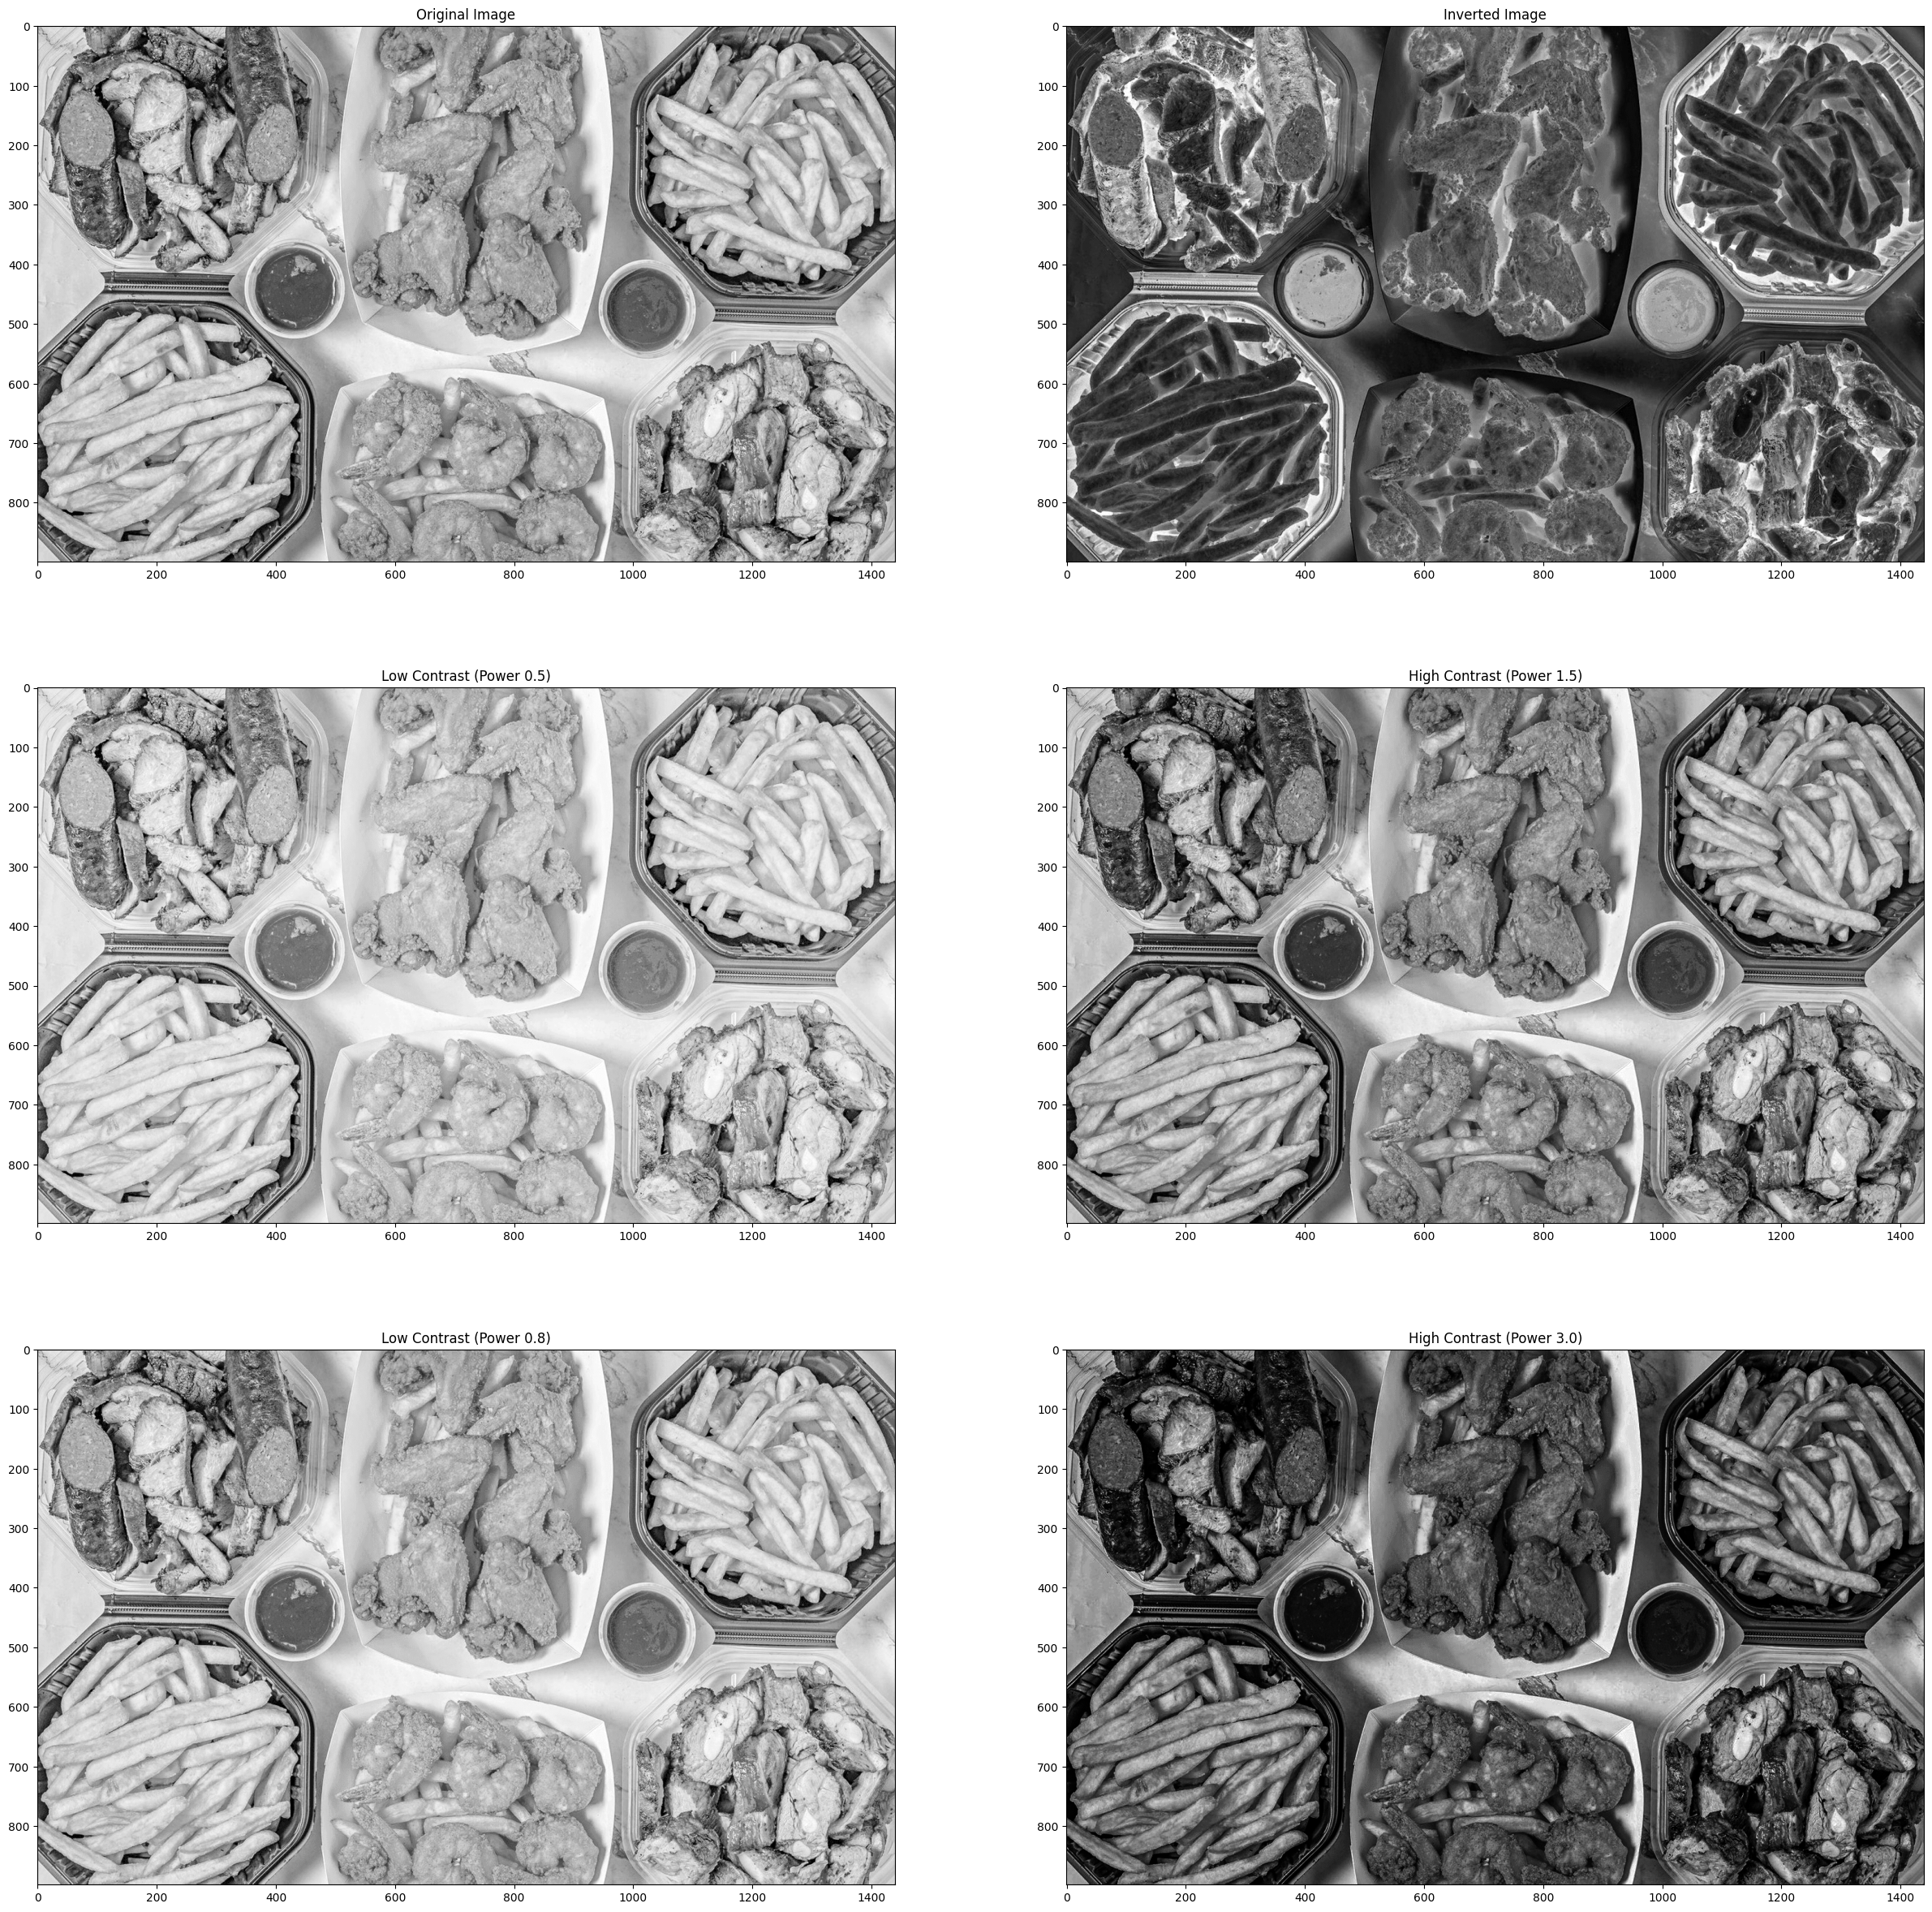

In [ ]:
image_path = "/content/food_image2.png" # Classic meal of Chicago enjoy:)
process_image(image_path)

# **Part 2: Basic Gray Level Transformations - Explanation and Analysis**

This section explores **grayscale conversion, inversion, and contrast manipulation** through **image transformations**.

---

## **(a) Image Preprocessing**
### **1. Converting to Grayscale**
- If the image is **color (RGB)**, it is first **converted to grayscale**.
- This ensures that transformations only affect **intensity values**, not color channels.
- Grayscale images are **easier to process** and reduce **computational complexity**.

### **2. Normalization to Floating-Point Values**
- If the image is stored as **integers (0-255)**, it is **converted to floating-point values (0.0 - 1.0)**.
- This is done using:

  $$
  I_{\text{new}} = \frac{I_{\text{old}}}{255.0}
  $$

- **Why?** Many image transformations work best with values in the **range of 0 to 1**.

---

## **(b) Inverting the Image**
- The inverted image is created using:

  $$
  I_{\text{new}} = 1.0 - I_{\text{old}}
  $$

- **Effect:**  
  - Bright areas become **dark** and vice versa.
  - This is similar to a **negative effect** used in photography.

---

## **(c) Adjusting Contrast Using Power Function**
- The contrast of the image is modified using:

  $$
  I_{\text{new}} = I_{\text{old}}^{\text{power value}}
  $$

- **Power values used**:  
  - **Two values between 0.25 - 0.99** → **Decreases contrast**  
  - **Two values between 1.1 - 4.0** → **Increases contrast**

### **1. Decreased Contrast (Power < 1)**
- **Effect:** The image looks **faded or washed out**.
- **Reason:** **Dark pixels become brighter** and **bright pixels become darker**, reducing overall contrast.

### **2. Increased Contrast (Power > 1)**
- **Effect:** Enhances details, making edges and shadows **more prominent**.
- **Reason:** **Dark pixels get darker**, and **bright pixels get brighter**, intensifying contrast.

---

## **(d) Converting Back for Display**
- After transformations, images are **converted back** to **0-255 integer format** for display.
- This is done using:

  $$
  I_{\text{display}} = I_{\text{new}} \times 255.0
  $$





# Part 3 – Image Transformations

Image scaling is just one kind of transformation that we could use to modify an image. It belongs to a more general class of transformations called affine transformations. Do some research on affine transformations (Wikipedia is typically a good place to start). In this part, you will be required to write
code to rotate the image around a given point. Note that results for any rotation vary significantly depending on the point used as the axis. You are allowed to use existing library functions for this. Your
code should do the following:

1) Load the input image.

2) Use a library function to rotate the image around it’s top-left corner +45 degrees.

3) Use a library function to rotate the image around it’s top-left corner -45 degrees.

4) Use a library function to rotate the image around it’s center +45 degrees.

5) Use a library function to rotate the image around it’s center -45 degrees.

For every input image (you have 3 inputs, see Data), you must show: the original image, 2 images rotated around the top-left corner, and 2 images rotated around their center.

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def rotate_image(image, angle, pivot):
  """
  Rotates an image around a given pivot point.
  - Angle: Roatation angle in degrees (positive for counterclockwise, and negative for clockwise)
  - pivot: Tuple(x, y) defining the rotation center
  """
  (h, w) = image.shape[:2]
  rotation_matrix = cv2.getRotationMatrix2D(pivot, angle, 1.0) # compute rotation matrix
  rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h)) # Apply affine transform
  return rotated_image

In [ ]:
image_path = "/content/image_3.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

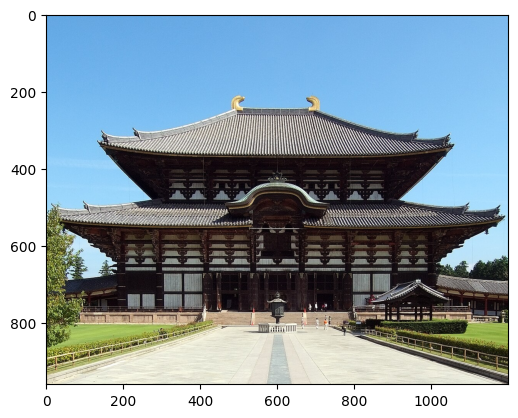

In [ ]:
plt.imshow(image)

In [ ]:
# Image Dimensions
(h, w) = image.shape[:2]
center = (w // 2, h // 2) # center for the image
top_left = (0, 0) # top left corner

In [ ]:
# Perform rotations
rotated_image_tl_pos = rotate_image(image, 45, top_left)
rotated_image_tl_neg = rotate_image(image, -45, top_left)
rotated_center_45_pos = rotate_image(image, 45, center)
rotated_center_45_neg = rotate_image(image, -45, center)

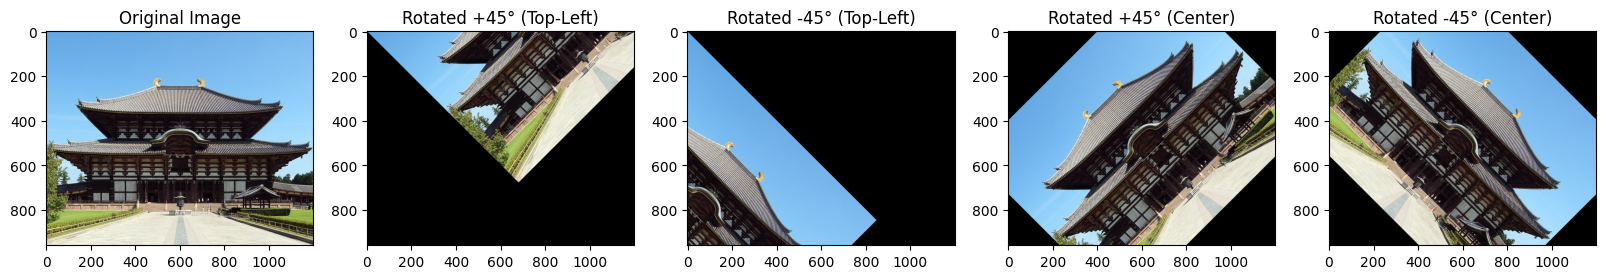

In [ ]:
# Display the results
fig, axes = plt.subplots(1, 5, figsize = (20, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")

axes[1].imshow(rotated_image_tl_pos)
axes[1].set_title("Rotated +45° (Top-Left)")

axes[2].imshow(rotated_image_tl_neg)
axes[2].set_title("Rotated -45° (Top-Left)")

axes[3].imshow(rotated_center_45_pos)
axes[3].set_title("Rotated +45° (Center)")

axes[4].imshow(rotated_center_45_neg)
axes[4].set_title("Rotated -45° (Center)")

plt.show()

# **Part 3: Image Transformations - Explanation and Analysis**

This section covers **image rotation using affine transformations**. We rotate images **around two different pivot points**:  
1. **Top-left corner**  
2. **Center of the image**  

Each rotation is performed for **+45° and -45°**.  

---

## **(a) Understanding Rotation (Affine Transformations)**
- **Rotation is an affine transformation** that shifts pixel positions while preserving straight lines and angles.
- The transformation matrix for rotating a point \((x, y)\) around a pivot \((x_0, y_0)\) by an angle \(\theta\) is:

  $$
  x' = x_0 + (x - x_0) \cos{\theta} - (y - y_0) \sin{\theta}
  $$

  $$
  y' = y_0 + (x - x_0) \sin{\theta} + (y - y_0) \cos{\theta}
  $$

- **Using OpenCV**, we compute the rotation matrix with:
  ```python
  rotation_matrix = cv2.getRotationMatrix2D(pivot, angle, 1.0)


and apply it using:
**rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))**


(b) Rotation Around the Top-Left Corner

 - The pivot point is set at (0,0).
 - Rotating by +45° shifts pixels counterclockwise.
 - Rotating by -45° shifts pixels clockwise.
 - This transformation causes parts of the image to move out of frame, leading to cropping.


(c) Rotation Around the Center

 - The pivot point is set at the center of the image:
 Center (w / 2, H / 2)
 - Rotating by +45° and -45° keeps the image centered, reducing cropping effects.
 - OpenCV automatically shifts the pixels, but padding is needed to preserve all parts.
